# Определение перспективного тарифа для телеком компании


Описание тарифов

Тариф «Смарт»:
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    + минута разговора: 3 рубля
    + сообщение: 3 рубля
    + 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    + минута разговора: 1 рубль
    + сообщение: 1 рубль
    + 1 Гб интернет-трафика: 150 рублей
    





## Шаг 1. Открытие файлов с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')
data_calls.info()
data_internet.info()
data_messages.info()
data_tariffs.info()
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

In [3]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Вывод**

Итак, перед нами несколько Дата фреймов с различной информацией о клиентах и тарифах. Так же перед нами стоит несколько задач:

- Проанализировать поведение клиентов данной выборки: определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
- Проверить гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".
- Проверить гипотезу: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Исходя их задач, считаю, что не вся предоставленая информация нам необходима, например: имя, фамилия, дата регистрации и дата закрытия счета, на первый взгляд, выглядят как абсолютно не нужная информация для нашего исследования.

Что касается данных:
- Все даты имеют формат object. Стоит изменить на более подходящий.
- База данных "data_internet" имеет безымянный столбец, на первый взгляд, дублирующий индексы, стоит проверить так ли это и если да, избавиться от него.
- Так как одна из наших задач напрямую завист от данных о городе пользователей, стоит внимательнее отнестись к этому столбцу на случай наличия ошибок в названии, регистре и пр.
- В базе данных звонков присутствуют строки с длительностью звонка 0.0 мин. У нас нет точной информации и уточнить её негде, поэтому буду считать, что это исходящие звонки на которые не ответили. Так как, по факту, разговора не состоялось в момент этого звонка, но, скорее всего, если дело было важное, позже последовал повторный звонок, который учтен в нашей БД, нам стоит удалить подобные записи, ведь нас интересует не суммарное количество звонков, а суммарное время разговоров. (Предполагаю, что отсчет времени начинается после поднятия трубки второй стороной).

P.S. Хоть в одном из заданий и есть требование, посчитать кол-во звонков для каждого клиента, в дальнейшем придется оперировать только минутами, поэтому считаю, что имею право удалить "не состоявшиеся разговоры".



## Шаг 2. Подготовка данных

### Проверка интернет данных на наличие выбросов и аномальных значений.

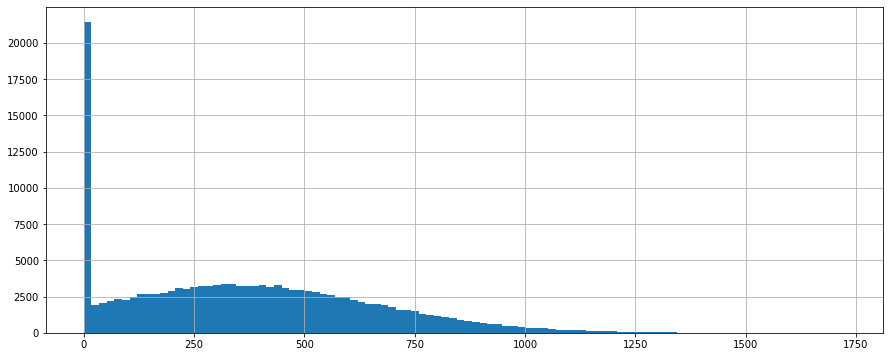

In [8]:
data_internet['mb_used'].hist(bins = 100, figsize = (15,6))

Гистограмма израсходованного трафика по интернет-сессиям является типичным распределением Пуассона, за исключением большого кол-ва сессий одного размера равного 0. Так как информации в описаниях тарифа о бесплатном доступе к трафику мессенджеров или каких либо других приложений нет, предположу, что это сессии использования приложения самого мобильного оператора или его сайта. 

Количество сессий нас не интересует, нам важен только трафик, поэтому считаю, что мы спокойно можем избавиться от этих данных:

In [9]:
data_internet = data_internet[data_internet['mb_used'] != 0.0].reset_index(drop = True)
data_internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
129793,149390,1499_151,752.72,2018-10-11,1499
129794,149391,1499_152,318.90,2018-10-03,1499
129795,149392,1499_153,490.13,2018-12-14,1499
129796,149394,1499_155,1246.32,2018-11-26,1499
129797,149395,1499_156,544.37,2018-10-26,1499


### Изменим формат дат для всех датафреймов:

In [10]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')

### Работа со столбцом Unnamed: 0 в БД интернет трафика

In [11]:
len(data_internet['Unnamed: 0'].unique()) 

129798

In [12]:
data_internet['Unnamed: 0'].tail()

129793    149390
129794    149391
129795    149392
129796    149394
129797    149395
Name: Unnamed: 0, dtype: int64

Количество уникальных значений совпадает с кол-вом строк в БД, последние, как и первые значения данного столбца полностью дублируют индексы строки, думаю этого достаточно, для принятия решения об удалении столбца:

In [13]:
del data_internet['Unnamed: 0']
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


### Работа с БД data_users

В этой базе данных, считаю, что стоит:
- проверить столбец "города" на опечатки в названии
- проверить на дубликаты
- удалить столбцы, которые нам не понадобятся в исследовании: age, churn_date, first_name, last_name

#### Города

In [14]:
len(data_users['city'].unique())

76

In [15]:
data_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

При визуальном осмотре уникальных значений в названиях городов опечаток и неверных регистров не обнаружено.

#### Дубликаты

In [16]:
data_users.duplicated().value_counts()

False    500
dtype: int64

Дубликатов не обнаружино, теперь можно удалить ненужные столбцы

#### Удаление ненужной информации

In [17]:
data_users.drop(['age', 'churn_date', 'first_name', 'last_name'], axis = 1, inplace=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
user_id     500 non-null int64
city        500 non-null object
reg_date    500 non-null datetime64[ns]
tariff      500 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.8+ KB


### Удаление звонков с длительностью 0.0 мин.

In [18]:
data_calls = data_calls[data_calls['duration'] != 0.0].reset_index(drop = True)
data_calls.tail()

,id,call_date,duration,user_id
162989,1499_215,2018-12-26,0.76,1499
162990,1499_216,2018-10-18,18.83,1499
162991,1499_217,2018-11-10,10.81,1499
162992,1499_218,2018-10-06,4.27,1499
162993,1499_219,2018-12-14,19.62,1499


### Округление длительности каждого разговора и использованного трафика.

Так как оператор всегда округляет вверх значения минут и мегабайтов, то нам стоит сразу это сделать в исходных базах данных и в дальнейшем работать с целыми числами:

In [19]:
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls['duration'] = data_calls['duration'].astype('int')
data_calls.head()

,id,call_date,duration,user_id
0,1000_2,2018-06-11,3,1000
1,1000_3,2018-09-21,14,1000
2,1000_4,2018-12-15,6,1000
3,1000_7,2018-08-22,19,1000
4,1000_8,2018-09-15,19,1000


In [20]:
data_internet['mb_used'] = np.ceil(data_internet['mb_used'])
data_internet['mb_used'] = data_internet['mb_used'].astype('int')
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


### Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого клиента

In [21]:
data_calls['month'] = data_calls['call_date'].dt.month              # Создание столбца, содержащего информацию о месяце, в котором совершен звонок.
data_users_сalls = data_users.set_index('user_id').join(            # Добавляем столбцы с колицеством звонков в каждый из 
    data_calls.pivot_table(                                         # месяцев для каждого пользователя
        index = ['user_id'],
        columns = 'month',
        values = 'duration',
        aggfunc = 'count',
        fill_value=0)
)
data_users_сalls.columns = ['city', 'reg_date', 'tariff', 'noc1', 'noc2', 'noc3', 'noc4', 'noc5', 'noc6', 'noc7', 'noc8', 'noc9', 'noc10', 'noc11', 'noc12']
# Переименовываем столбцы, чтобы следующие, содержащие информацию о длительности разговоров не наложились на предыдущие
data_users_сalls = data_users_сalls.join(
    data_calls.pivot_table(                                         # Добавляем столбцы с длительностью звонков в каждый из
        index = ['user_id'],                                        # месяцев для каждого пользователя
        columns = 'month',
        values = 'duration',
        aggfunc = 'sum',
        fill_value=0)
)
   
del data_users_сalls['reg_date']                                    # Удаляем столбец с ненужной информацией
data_users_сalls = data_users_сalls.fillna(value = 0.0)             # Заполняем пропуски нулями, т.к. если есть пропуск,
                                                                    #значит пользователь не звонил в этом месяце и кол-во 
                                                                    #звонков и длительность разговоров равна 0.
        
data_users_сalls.loc[:, 'noc1' : 'noc12'] = data_users_сalls.loc[:, 'noc1' : 'noc12'].astype('int') # Переводим тип столбцов, 
                                                                    #содержащих информацию о кол-ве звонков в целочисленный
                                                                    #формат.

for i in range(1, 13):
    data_users_сalls.loc[:, i] = data_users_сalls.loc[:, i].astype('int')
data_users_сalls.head()

,city,tariff,noc1,noc2,noc3,noc4,noc5,noc6,noc7,noc8,...,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,,,,,,,,
1000,Краснодар,ultra,0,0,0,0,17,28,41,42,...,0,0,159,172,340,408,466,350,338,333
1001,Москва,smart,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,430,414
1002,Стерлитамак,smart,0,0,0,0,0,14,21,37,...,0,0,0,117,214,289,206,212,243,236
1003,Москва,ultra,0,0,0,0,0,0,0,43,...,0,0,0,0,0,380,961,855,824,802
1004,Новокузнецк,ultra,0,0,0,0,7,25,20,18,...,0,0,35,171,135,137,117,145,117,130


Я создал новую БД и изменил стандартные индексы БД на индексы клиентов для удобства дальнешей работы с несколькими БД одновременно, а так же добавил столбцы с информацией о количестве звонков (без учета звонков с длинной разговора 0.0 мин) - noc(number of calls) и общей продолжительностью разговоров для каждого из месяцев рассматриваемого 2018 года.

### Количество отправленных сообщений по месяцам

In [22]:
data_messages['month'] = data_messages['message_date'].dt.month
data_users_messages = data_users.set_index('user_id').join(
    data_messages.pivot_table(
        index = ['user_id'],
        columns = 'month',
        values = 'id',
        aggfunc = 'count',
        fill_value=0)
)
del data_users_messages['reg_date']
data_users_messages = data_users_messages.fillna(value = 0.0)
for i in range(1, 13):
    data_users_messages.loc[:, i] = data_users_messages.loc[:, i].astype('int')
data_users_messages.head(12)

,city,tariff,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,
1000,Краснодар,ultra,0,0,0,0,22,60,75,81,57,73,58,70
1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,0,0
1002,Стерлитамак,smart,0,0,0,0,0,4,11,13,4,10,16,12
1003,Москва,ultra,0,0,0,0,0,0,0,37,91,83,94,75
1004,Новокузнецк,ultra,0,0,0,0,95,134,181,151,146,165,158,162
1005,Набережные Челны,smart,7,38,56,41,42,47,56,64,52,44,51,54
1006,Ульяновск,smart,0,0,0,0,0,0,0,0,0,0,0,0
1007,Москва,smart,0,0,0,11,39,26,26,27,31,18,21,26
1008,Челябинск,smart,0,0,0,0,0,0,0,0,0,0,0,56


Я создал новую БД содержащию информацию по количеству отправленных сообщений по месяцам для каждого пользователя из нашей выборки.

### Объем израсходованного интернет-трафика по месяцам

In [23]:
data_internet['month'] = data_internet['session_date'].dt.month
data_users_internet = data_users.set_index('user_id').join(
    data_internet.pivot_table(                                         
        index = ['user_id'],                                        
        columns = 'month',
        values = 'mb_used',
        aggfunc = 'sum',
        fill_value=0)
)
del data_users_internet['reg_date']
data_users_internet = data_users_internet.fillna(value = 0.0)
for i in range(1, 13):
    data_users_internet.loc[:, i] = data_users_internet.loc[:, i].astype('int')
data_users_internet.head(12)

,city,tariff,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,
1000,Краснодар,ultra,0,0,0,0,2256,23257,14016,14070,14581,14717,14768,9827
1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,18452,14053
1002,Стерлитамак,smart,0,0,0,0,0,10871,17601,20347,16712,13905,18610,18137
1003,Москва,ultra,0,0,0,0,0,0,0,8571,12479,14779,11368,10132
1004,Новокузнецк,ultra,0,0,0,0,13415,17619,22243,28607,15125,18494,15631,18038
1005,Набережные Челны,smart,2730,7394,11117,9365,7877,9875,7703,7554,7027,7809,12682,8680
1006,Ульяновск,smart,0,1395,17309,13954,12984,12388,20000,19327,15543,19722,13275,18498
1007,Москва,smart,0,0,0,8031,17708,13674,15680,20723,12630,14444,16390,12512
1008,Челябинск,smart,0,0,0,0,0,0,0,0,0,0,0,13236


Я создал новую БД содержащию информацию по количеству израсходованного трафика по месяцам для каждого пользователя из нашей выборки.

### Помесячная выручка с каждого пользователя

Создам новую БД **data_earnings**, содержащую выручку,полученную от каждого клиента по месяцам за разговоры:

In [24]:
data_earnings = data_users_сalls[['city', 'tariff',1,2,3,4,5,6,7,8,9,10,11,12]]
for r in range(1000, len(data_earnings)+1000):
    if data_earnings.loc[r, 'tariff'] == 'smart':
        for c in range(1, 13):
            if data_earnings.loc[r, c] != 0:
                if data_earnings.loc[r, c] - 500 < 0:
                    data_earnings.loc[r, c] = 550
                else:
                    data_earnings.loc[r, c] = 550 + (data_earnings.loc[r, c] - 500) * 3
    else:
        for c in range(1, 13):
            if data_earnings.loc[r, c] != 0:
                if data_earnings.loc[r, c] - 3000 < 0:
                    data_earnings.loc[r, c] = 1950
                else:
                    data_earnings.loc[r, c] = 1950 + (data_earnings.loc[r, c] - 3000) * 3
data_earnings.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,city,tariff,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,
1000,Краснодар,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,550,550
1002,Стерлитамак,smart,0,0,0,0,0,550,550,550,550,550,550,550
1003,Москва,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
1004,Новокузнецк,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950


Теперь к этом данным мне надо прибафить выручку, полученную за использование интернета и сообщений:

In [25]:
# Прибавляем плату за интернет:
for r in range(1000, len(data_earnings)+1000):
    if data_earnings.loc[r, 'tariff'] == 'smart':
        for c in range(1, 13):
            if data_earnings.loc[r, c] == 0:
                if data_users_internet.loc[r, c] != 0:
                    if data_users_internet.loc[r, c] <= 1024:
                        data_earnings.loc[r, c] = 550
                    else:
                        data_earnings.loc[r, c] = 550 + math.ceil((data_users_internet.loc[r, c] - 1024)/1024)*200
            else:

                if data_users_internet.loc[r, c] > 1024:
                    data_earnings.loc[r, c] += math.ceil((data_users_internet.loc[r, c] - 1024)/1024)*200
    else:   # Тариф Ультра
        for c in range(1, 13):
            if data_earnings.loc[r, c] == 0:
                if data_users_internet.loc[r, c] != 0:
                    if data_users_internet.loc[r, c] <= 1024 * 30:
                        data_earnings.loc[r, c] = 1950
                    else:
                        data_earnings.loc[r, c] = 1950 + math.ceil((data_users_internet.loc[r, c] - 1024 * 30)/1024)*150
            else:
                if data_users_internet.loc[r, c] != 0:
                    if data_users_internet.loc[r, c] > 1024 * 30:
                        data_earnings.loc[r, c] += math.ceil((data_users_internet.loc[r, c] - 1024 * 30)/1024)*150 

In [26]:
# Прибавляем плату за сообщения: 
for r in range(1000, len(data_earnings)+1000):
    if data_earnings.loc[r, 'tariff'] == 'smart':
        for c in range(1, 13):
            if data_earnings.loc[r, c] == 0:
                if data_users_messages.loc[r, c] != 0:
                    if data_users_messages.loc[r, c] <= 50:
                        data_earnings.loc[r, c] = 550
                    else:
                        data_earnings.loc[r, c] = 550 + (data_users_messages.loc[r, c] - 50) * 3
            else:
                if data_users_messages.loc[r, c] > 50:
                    data_earnings.loc[r, c] += (data_users_messages.loc[r, c] - 50) * 3
    else:   # Тариф Ультра
        for c in range(1, 13):
            if data_earnings.loc[r, c] == 0:
                if data_users_messages.loc[r, c] != 0:
                    if data_users_messages.loc[r, c] <= 1000:
                        data_earnings.loc[r, c] = 1950
                    else: # Если сообщений больше 1000
                        data_earnings.loc[r, c] = 1950 + data_users_messages.loc[r, c] - 1000
                else: #Если абонентская плата уже начислена
                    if data_users_messages.loc[r, c] > 1000:
                        data_earnings.loc[r, c] += data_users_messages.loc[r, c] - 1000

In [27]:
data_earnings.head()

,city,tariff,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,
1000,Краснодар,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,4150,3150
1002,Стерлитамак,smart,0,0,0,0,0,2550,3950,4350,3750,3150,4150,3950
1003,Москва,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
1004,Новокузнецк,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950


В итоге получилась БД с выручкой за каждый месяц за каждого пользователя.

## Шаг 3. Анализ данных

### Время разговора

Перед вычислением среднего значения длительности разговоров по месяцам нам необходимо отсеять пользователей, которые еще не были подлючены к тарифу, т.е. в базе **data_earnings** имеют 0. (Мы не можем исключать тех, у кого 0 только в потраченных минутах, т.к. могут быть пользователи, которые использовали интерент и/или сообщения, но мобильной связью не пользовались вообще, в таком случае их 0 должен быть учтен).


Для облегчения работы, я решил пройти по базе данных **data_earnings**, вычислить не подлкюченных в конкретный месяц пользователей и в 3ёх других таблицах это отметить значением -1 в соответствующих полях. Данный маркер позволит мне не учитывать их при рассчете статистики:

In [28]:
for r in range(1000, len(data_earnings)+1000):
    for c in range(1, 13):
        if data_earnings.loc[r, c] == 0:
            data_users_сalls.loc[r, c] = -1
            data_users_internet.loc[r, c] = -1
            data_users_messages.loc[r, c] = -1

In [29]:
data_users_сalls_smart = data_users_сalls[data_users_сalls['tariff'] == 'smart']
data_users_сalls_ultra = data_users_сalls[data_users_сalls['tariff'] == 'ultra']

data_users_сalls_stat_smart = data_users_сalls_smart[
    data_users_сalls_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]].mean().to_frame(name = 'mean')

data_users_сalls_stat_ultra = data_users_сalls_ultra[
    data_users_сalls_ultra[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]].mean().to_frame(name = 'mean')

In [30]:
data_users_сalls_stat_smart['variance'] = np.var(data_users_сalls_smart[
    data_users_сalls_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]])
data_users_сalls_stat_smart['standard_deviation'] = np.sqrt(data_users_сalls_stat_smart['variance'])
data_users_сalls_stat_smart.round().head(12)

data_users_сalls_stat_ultra['variance'] = np.var(data_users_сalls_ultra[
    data_users_сalls_ultra[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]])
data_users_сalls_stat_ultra['standard_deviation'] = np.sqrt(data_users_сalls_stat_ultra['variance'])
data_users_сalls_stat_smart.round().head(12)

,mean,variance,standard_deviation
1,204.0,23088.0,152.0
2,299.0,35784.0,189.0
3,390.0,36345.0,191.0
4,367.0,34468.0,186.0
5,387.0,34573.0,186.0
6,396.0,30555.0,175.0
7,408.0,32090.0,179.0
8,421.0,34646.0,186.0
9,429.0,33406.0,183.0
10,426.0,35272.0,188.0


In [31]:
data_users_сalls_stat_ultra.round().head(12)

,mean,variance,standard_deviation
1,428.0,64684.0,254.0
2,297.0,84256.0,290.0
3,490.0,108374.0,329.0
4,458.0,70351.0,265.0
5,510.0,82618.0,287.0
6,480.0,90446.0,301.0
7,546.0,93286.0,305.0
8,511.0,97041.0,312.0
9,539.0,104797.0,324.0
10,558.0,105599.0,325.0


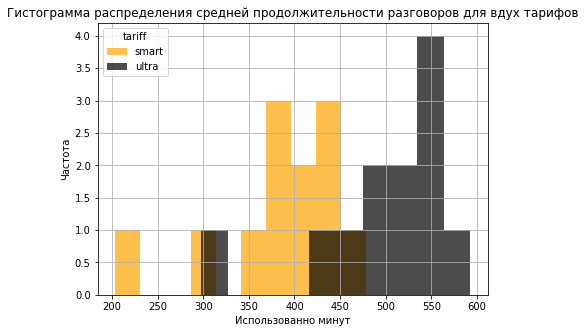

In [32]:
plt.figure(figsize=(7, 5))
plt.hist(data_users_сalls_stat_smart['mean'], bins = 10, alpha = 0.7, label='smart', color='orange')
plt.hist(data_users_сalls_stat_ultra['mean'], bins = 10, alpha = 0.7, label='ultra', color='black')
plt.legend(loc='upper left', title = 'tariff')
plt.grid(True)
plt.title('Гистограмма распределения средней продолжительности разговоров для вдух тарифов')
plt.xlabel('Использованно минут')
plt.ylabel('Частота')
plt.show()

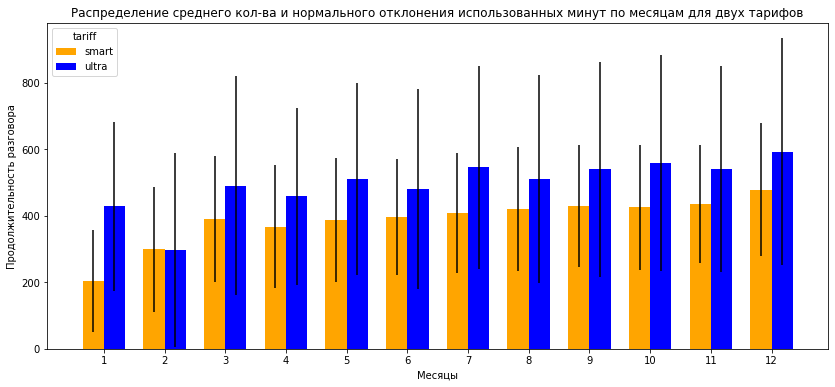

In [33]:
x = np.arange(len(data_users_сalls_stat_smart['mean']))+1
fig, ax = plt.subplots(figsize=(14, 6))
ax.set(title='Распределение среднего кол-ва и нормального отклонения использованных минут по месяцам для двух тарифов',
       ylabel= 'Продолжительность разговора',
       xlabel = 'Месяцы')
width = 0.35
smart = ax.bar(x - width/2, data_users_сalls_stat_smart['mean'], width, color = 'orange', label = 'smart', yerr = data_users_сalls_stat_smart['standard_deviation'])
ultra = ax.bar(x + width/2, data_users_сalls_stat_ultra['mean'], width, color = 'blue', label = 'ultra', yerr = data_users_сalls_stat_ultra['standard_deviation'])
ax.legend(loc='upper left', title = 'tariff')
ax.set_xticks(x)
plt.show()

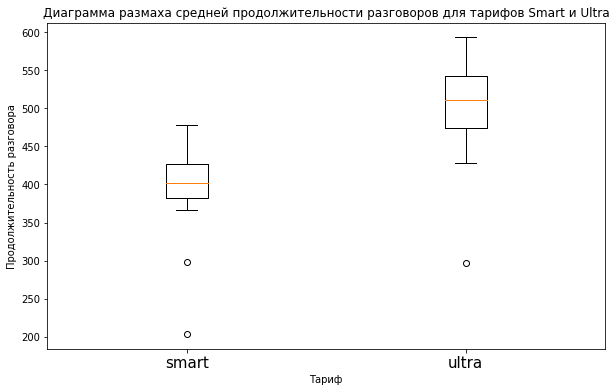

In [34]:
x1 = ['smart', 'ultra']
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set(
    axisbelow=True,
    title='Диаграмма размаха средней продолжительности разговоров для тарифов Smart и Ultra',
    xlabel='Тариф',
    ylabel='Продолжительность разговора',
)
fig, ax1.set_xticklabels(x1, fontsize=15)
plt.boxplot([data_users_сalls_stat_smart['mean'],data_users_сalls_stat_ultra['mean']])
plt.show()

**Вывод**

Как мы видим из гистограмм:
- пользователи тарифа ultra в каждый из месяцов 2018 года кроме февраля, используют больше минут, чем пользователи тарифа Smart.
- Среднее значение использованных минут в тарифе Smart близко к кол-ву минут, включенных в абонентскую плату, но все же ниже в каждый из месяцов. Если же обратить внимание на степень отклонения, то можно понять, что мало пользователей вообще выходял за лимит пакета.
- Среднее значение использованных минут в тарифе Ultra гораздо ниже кол-ва минут, включенных в абонентскую плату. Если же обратить внимание на степень отклонения, то применив правило 3ёх сигм, легко понять, что 99% клиентов не использвуют все минуты, включенные в абонентскую плату.
- На графике с коробками мы видим, что январь и февраль сильно отличаются по среднему времени разговоров на тарифе Smart. На тарифе Ultra выбросом отмечен только февраль. В феврале меньше всего дней, скорее всего эо повлияло на общую продолжительность разговоров, а вот почему в январе разговоры по мобильному телефону были столь не популярны на тарифе Smart - не совсем ясно.


In [35]:
data_users_сalls_smart = data_users_сalls.query('tariff == "smart"')
data_users_сalls_smart[data_users_сalls_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0][[1]].describe()

,1
count,34.000000
mean,203.852941
std,154.231454
min,0.000000
25%,78.250000
50%,162.500000
75%,325.250000
max,551.000000


Как мы видим, из нашей подборки в 351 человека с тарифом smart, всего 34 были подключены к тарифу в январе. Возможно, столь низкие показатели связаны с тем, что данный тариф появился на рынке лишь в этом месяце?!

### Сообщения

In [36]:
data_users_messages_smart = data_users_messages[data_users_messages['tariff'] == 'smart']
data_users_messages_ultra = data_users_messages[data_users_messages['tariff'] == 'ultra']

data_users_messages_stat_smart = data_users_messages_smart[
    data_users_messages_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]].mean().to_frame(name = 'mean')

data_users_messages_stat_ultra = data_users_messages_ultra[
    data_users_messages_ultra[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]].mean().to_frame(name = 'mean')

data_users_messages_stat_smart['variance'] = np.var(data_users_messages_smart[
    data_users_messages_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]])
data_users_messages_stat_smart['standard_deviation'] = np.sqrt(data_users_messages_stat_smart['variance'])
data_users_messages_stat_smart.round().head(12)

data_users_messages_stat_ultra['variance'] = np.var(data_users_messages_ultra[
    data_users_messages_ultra[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]])
data_users_messages_stat_ultra['standard_deviation'] = np.sqrt(data_users_messages_stat_ultra['variance'])
data_users_messages_stat_smart.round().head(12)

,mean,variance,standard_deviation
1,18.0,255.0,16.0
2,24.0,465.0,22.0
3,32.0,709.0,27.0
4,31.0,597.0,24.0
5,34.0,726.0,27.0
6,33.0,802.0,28.0
7,34.0,796.0,28.0
8,34.0,835.0,29.0
9,34.0,788.0,28.0
10,34.0,813.0,29.0


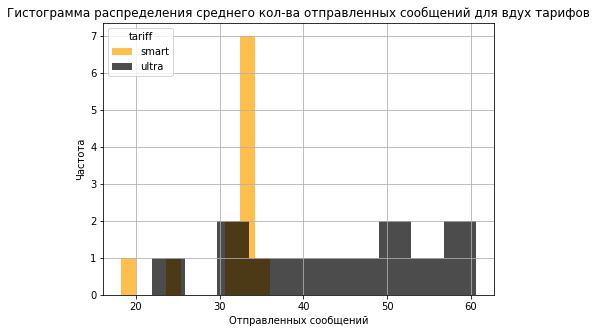

In [37]:
plt.figure(figsize=(7, 5))
plt.hist(data_users_messages_stat_smart['mean'], bins = 10, alpha = 0.7, label='smart', color='orange')
plt.hist(data_users_messages_stat_ultra['mean'], bins = 10, alpha = 0.7, label='ultra', color='black')
plt.legend(loc='upper left', title = 'tariff')
plt.title('Гистограмма распределения среднего кол-ва отправленных сообщений для вдух тарифов')
plt.xlabel('Отправленных сообщений')
plt.ylabel('Частота')
plt.grid(True)

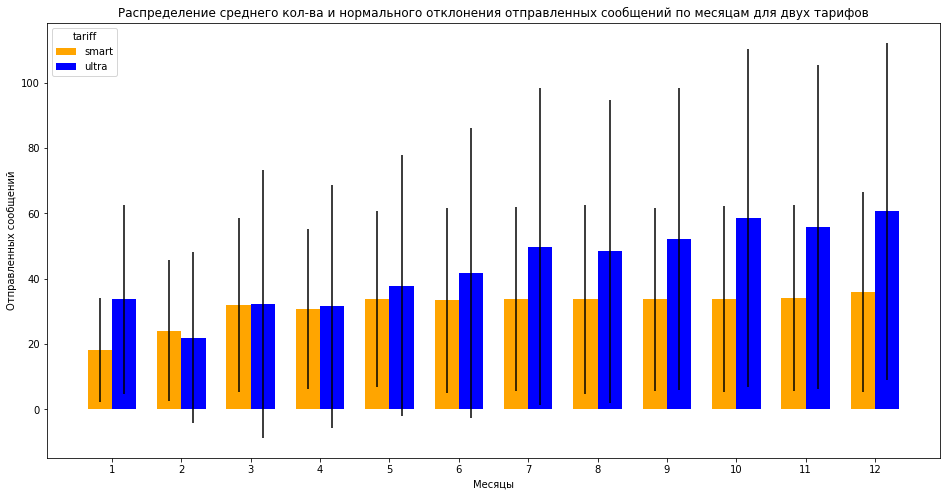

In [38]:
x2 = np.arange(len(data_users_messages_stat_smart['mean']))+1
fig, ax2 = plt.subplots(figsize=(16, 8))
ax2.set(title='Распределение среднего кол-ва и нормального отклонения отправленных сообщений по месяцам для двух тарифов',
       ylabel= 'Отправленных сообщений',
       xlabel = 'Месяцы')
smart2 = ax2.bar(x2 - width/2, 
                 data_users_messages_stat_smart['mean'],
                 width,
                 color = 'orange',
                 label = 'smart',
                 yerr = data_users_messages_stat_smart['standard_deviation'])
ultra2 = ax2.bar(x2 + width/2,
                 data_users_messages_stat_ultra['mean'],
                 width,
                 color = 'blue',
                 label = 'ultra',
                 yerr = data_users_messages_stat_ultra['standard_deviation'])
ax2.legend(loc='upper left', title = 'tariff')
ax2.set_xticks(x2)
plt.show()

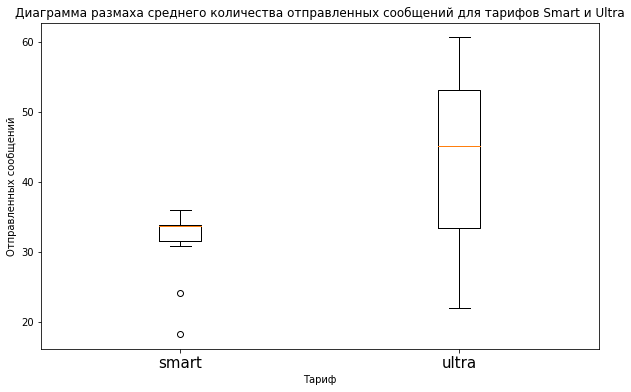

In [39]:
x3 = ['smart', 'ultra']
fig, ax3 = plt.subplots(figsize=(10, 6))
ax3.set(
    axisbelow=True,
    title='Диаграмма размаха среднего количества отправленных сообщений для тарифов Smart и Ultra',
    xlabel='Тариф',
    ylabel='Отправленных сообщений',
)
fig, ax3.set_xticklabels(x3, fontsize=15)
plt.boxplot([data_users_messages_stat_smart['mean'],data_users_messages_stat_ultra['mean']])
plt.show()

**Вывод**

- Среднее значение отправленных сообщений для пользователей тарифа Smart в каждый из месяцев, кроме первых двух, держится на уровне 30. Первые 2 месяца имеют гораздо более скромные показатели.
- Среднее значение отправленных сообщений для пользователей тарифа Ultra в каждый из месяцев медленно, но неуклонно возрастает, имея общее среднее за год около 45. Как и со звонками проседает февраль. Данные показатели никак не сопоставимы с возможностями пакета в 1000 сообщений в месяц.


### Объём интернет-трафика

In [40]:
data_users_internet_smart = data_users_internet[data_users_internet['tariff'] == 'smart']
data_users_internet_ultra = data_users_internet[data_users_internet['tariff'] == 'ultra']

data_users_internet_stat_smart = data_users_internet_smart[
    data_users_internet_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]].mean().to_frame(name = 'mean')

data_users_internet_stat_ultra = data_users_internet_ultra[
    data_users_internet_ultra[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]].mean().to_frame(name = 'mean')

data_users_internet_stat_smart['variance'] = np.var(data_users_internet_smart[
    data_users_internet_smart[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]])
data_users_internet_stat_smart['standard_deviation'] = np.sqrt(data_users_internet_stat_smart['variance'])
data_users_internet_stat_smart.round().head(12)

data_users_internet_stat_ultra['variance'] = np.var(data_users_internet_ultra[
    data_users_internet_ultra[[1,2,3,4,5,6,7,8,9,10,11,12]] >= 0
][[1,2,3,4,5,6,7,8,9,10,11,12]])
data_users_internet_stat_ultra['standard_deviation'] = np.sqrt(data_users_internet_stat_ultra['variance'])
(data_users_internet_stat_smart).round().head(12)

,mean,variance,standard_deviation
1,8524.0,40401912.0,6356.0
2,11611.0,38444878.0,6200.0
3,15124.0,33610354.0,5797.0
4,13479.0,32256756.0,5680.0
5,15825.0,35568296.0,5964.0
6,15815.0,33411437.0,5780.0
7,15764.0,34687658.0,5890.0
8,16632.0,31230055.0,5588.0
9,16325.0,26958061.0,5192.0
10,16779.0,34300047.0,5857.0


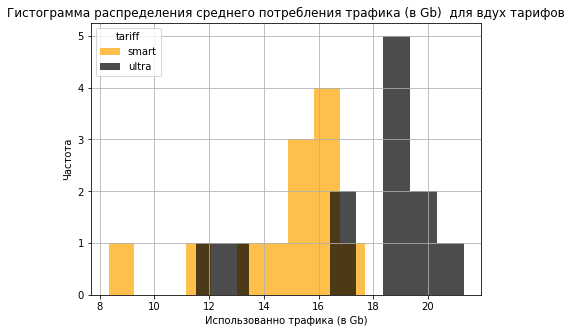

In [41]:
plt.figure(figsize=(7, 5))
plt.hist(data_users_internet_stat_smart['mean']/1024, bins = 10, alpha = 0.7, label='smart', color='orange')
plt.hist(data_users_internet_stat_ultra['mean']/1024, bins = 10, alpha = 0.7, label='ultra', color='black')
plt.legend(loc='upper left', title = 'tariff')
plt.title('Гистограмма распределения среднего потребления трафика (в Gb)  для вдух тарифов')
plt.xlabel('Использованно трафика (в Gb)')
plt.ylabel('Частота')
plt.grid(True)

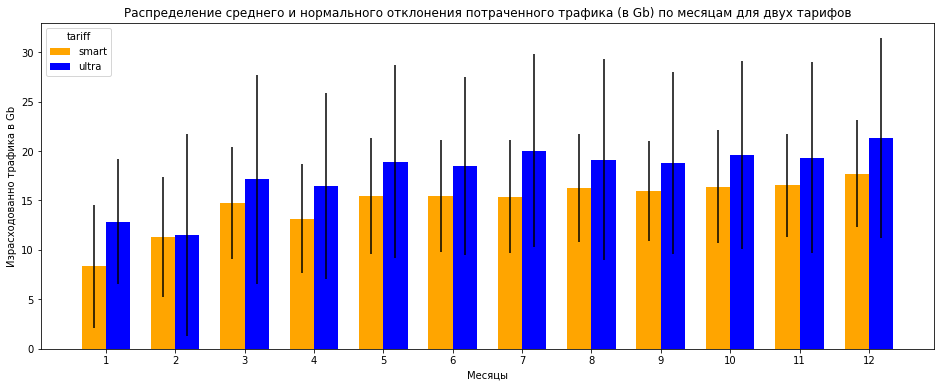

In [42]:
x4 = np.arange(len(data_users_internet_stat_smart['mean']))+1
fig, ax4 = plt.subplots(figsize=(16, 6))
ax4.set(title='Распределение среднего и нормального отклонения потраченного трафика (в Gb) по месяцам для двух тарифов',
       ylabel= 'Израсходованно трафика в Gb',
       xlabel = 'Месяцы')
smart4 = ax4.bar(x4 - width/2,
                 data_users_internet_stat_smart['mean']/1024,
                 width,
                 color = 'orange',
                 label = 'smart',
                 yerr = data_users_internet_stat_smart['standard_deviation']/1024)
ultra4 = ax4.bar(x4 + width/2,
                 data_users_internet_stat_ultra['mean']/1024,
                 width,
                 color = 'blue',
                 label = 'ultra',
                 yerr = data_users_internet_stat_ultra['standard_deviation']/1024)
ax4.legend(loc='upper left', title = 'tariff')
ax4.set_xticks(x4)
plt.show()

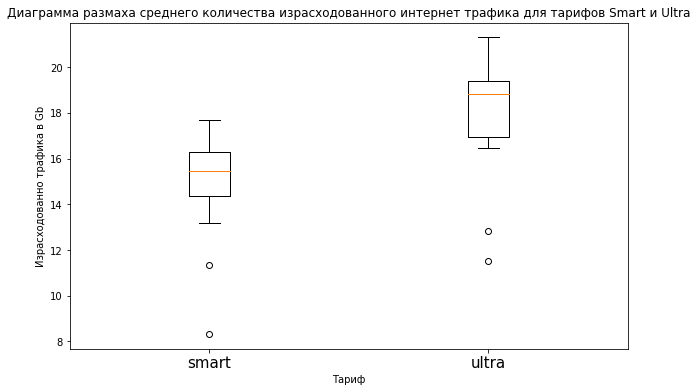

In [43]:
x5 = ['smart', 'ultra']
fig, ax5 = plt.subplots(figsize=(10, 6))
ax5.set(
    axisbelow=True,
    title='Диаграмма размаха среднего количества израсходованного интернет трафика для тарифов Smart и Ultra',
    xlabel='Тариф',
    ylabel='Израсходованно трафика в Gb',
)
fig, ax5.set_xticklabels(x5, fontsize=15)
plt.boxplot([data_users_internet_stat_smart['mean']/1024,data_users_internet_stat_ultra['mean']/1024])
plt.show()

**Вывод**

- Пользователи тарифа Smart в вопрсе пользования интернет довольно далеки, чтобы называться как и их тариф, ведь они превышают месячный лимит трафика в среднем в 16!!! раз с показателем в 16 Gb в месяц в среднем.
- Пользователи тарифа Ultra в 2018 году в среднем использовали чуть больше трафика, чем пользователи Smart - 19 Gb, но они укладывались в месячные лимиты тарифа. Если взглянуть на графике на показатели нормального отклонения, то мы можем предположить, что всего ~15% пользователей тарифа Ultra выходят за предложенный им тарифом объем трафика.
- Как обычно, февраль проседает по показателям для обоих тарифов.
- Январь, как и для 2ух других услуг связи, имеет самые низкие покзатели для тарифа Smart.

## Шаг 4. Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Для начала сформулирую нулевую гипотезу. На мой взгляд, в данном случае, она должна звучать так:

***Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны***

Так как наша гипотеза двухсторонняя (нам не важно, больше выручка пользователей тариф Ultra чем пользователей Smart), для данной нулевой гипотезы альтернативная будет звучать так:

***Средняя выручка пользователей тарифа Ultra не равна выручке пользователей тарифа Smart***

In [44]:
data_earnings_smart = data_earnings[data_earnings['tariff'] == 'smart'][[1,2,3,4,5,6,7,8,9,10,11,12]]
data_earnings_ultra = data_earnings[data_earnings['tariff'] == 'ultra'][[1,2,3,4,5,6,7,8,9,10,11,12]]
data_earnings_smart_mean = data_earnings_smart[data_earnings_smart > 0].mean()
data_earnings_ultra_mean = data_earnings_ultra[data_earnings_ultra > 0].mean()

results = st.ttest_ind(data_earnings_smart_mean, data_earnings_ultra_mean)
alpha = 0.01
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896350521328245e-08
Отвергаем нулевую гипотезу


In [45]:
data_earnings_smart_mean.head(12)

1     2103.676471
2     2768.982759
3     3517.870130
4     3170.232143
5     3637.226950
6     3651.579268
7     3652.805970
8     3848.255319
9     3780.715385
10    3883.901361
11    3905.705696
12    4223.041543
dtype: float64

In [46]:
data_earnings_ultra_mean.head(12)

1     1950.000000
2     1975.000000
3     2014.864865
4     2001.818182
5     2061.940299
6     2041.071429
7     2121.428571
8     2083.177570
9     2024.347826
10    2067.073171
11    2093.283582
12    2138.848921
dtype: float64

**Вывод**

Мы и сами мыжем увидеть из средних значений по месяцам, что выручка имеет кратное отличие. Пользователи тарифа Smart приносят гораздо больше прибыли, а имея предыдущий анализ, мы можем сделать вывод, что выгода главным образом берется из пользования интернетом. Пользователи же тарифа Ultra, помимо абонентской платы, как правило, никаких дополнительных плат не вносят.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза будет звучать так:

***Средняя выручка пользователей из Москвы и из других регионов равны***

Так как наша гипотеза двухсторонняя (нам не важно, больше выручка москвичей или меньше), для данной нулевой гипотезы альтернативная будет звучать так:

***Средняя выручка пользователей из Москвы не равна выручке пользователей других регионов***

In [47]:
data_earnings_moscow = data_earnings[data_earnings['city'] == 'Москва'][[1,2,3,4,5,6,7,8,9,10,11,12]]
data_earnings_not_moscow = data_earnings[data_earnings['city'] != 'Москва'][[1,2,3,4,5,6,7,8,9,10,11,12]]
len(data_earnings_moscow)

99

In [48]:
data_earnings_moscow_mean = data_earnings_moscow[data_earnings_moscow > 0].mean()
data_earnings_not_moscow_mean = data_earnings_not_moscow[data_earnings_not_moscow > 0].mean()
data_earnings_moscow_mean.head(12)

1     2575.000000
2     2303.714286
3     3089.600000
4     2841.241379
5     2854.871795
6     3057.106383
7     2908.392857
8     3207.161290
9     3127.955882
10    3118.160494
11    3258.692308
12    3405.739583
dtype: float64

In [49]:
data_earnings_not_moscow_mean.head(12)

1     1956.428571
2     2584.544118
3     3017.382979
4     2773.695652
5     3193.248521
6     3117.537313
7     3238.957627
8     3315.700000
9     3267.377850
10    3403.410714
11    3393.208914
12    3667.142105
dtype: float64

In [50]:
results2 = st.ttest_ind(data_earnings_moscow_mean, data_earnings_not_moscow_mean)
print('p-значение:', results2.pvalue.round(2))
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.54
Не получилось отвергнуть нулевую гипотезу


Как видно, нулевую гипотезу опровергнуть не удалось, это означает, что, судя по предоставленной выборке, мы не можем утверждать, что выручка от пользователей из Москвы как то выделяется на фоне страны.


## Шаг 5. Общий вывод


В результате исследования мне удалось выяснить:

- Средняя выручка пользователей тарифов Smart и Ultra не равны, для оператора сотовой связи гораздо большую выручку приносят пользователи тарифа Smart.
- Москва не отличается от других регионов по среднему уровню выручки пользователей.
- Тариф Smart: средний месячный показатель использованных минут находится ниже кол-ва минут, входящих в пакет; с сообщениями обстоит подобная ситуация; среднее превышение использованного трафика относительно объема, включенного в пакет - в 16 раз. Таким образом, в среднем, пользователи поверх абонентской платы тратят большие суммы на дополнительный интернет трафик.
- Тариф Smart: средний месячный показатель использованных минут находится гораздо ниже кол-ва минут, входящих в пакет; предлроженный пакет сообщений не используется по назначения никогда, а средний показатель находится гораздо ниже; предложенного пакета интернет трафика пользователям чаще всего достаточно, но иногда небольшой перерасход случается. Чаще всего, пользователи данного тарифа, тратят на связь только сумму абонентской платы - 1950 рублей.
- В каждый из месяцев, по каждой из 3ёх услуг, пользователи тарифа Ultra превосходят пользователей тарифа Smart.
- Для обоих тарифов характерны заниженные показатели для первых месяцев в 2018 году, у меня сложилось ощущение, что это на тот момент были новые тарифы и они только набирали клиентов, таким образом в рассчетах сильное влияние имели пользователи, пользовавшиеся тарифом не полный месяц.